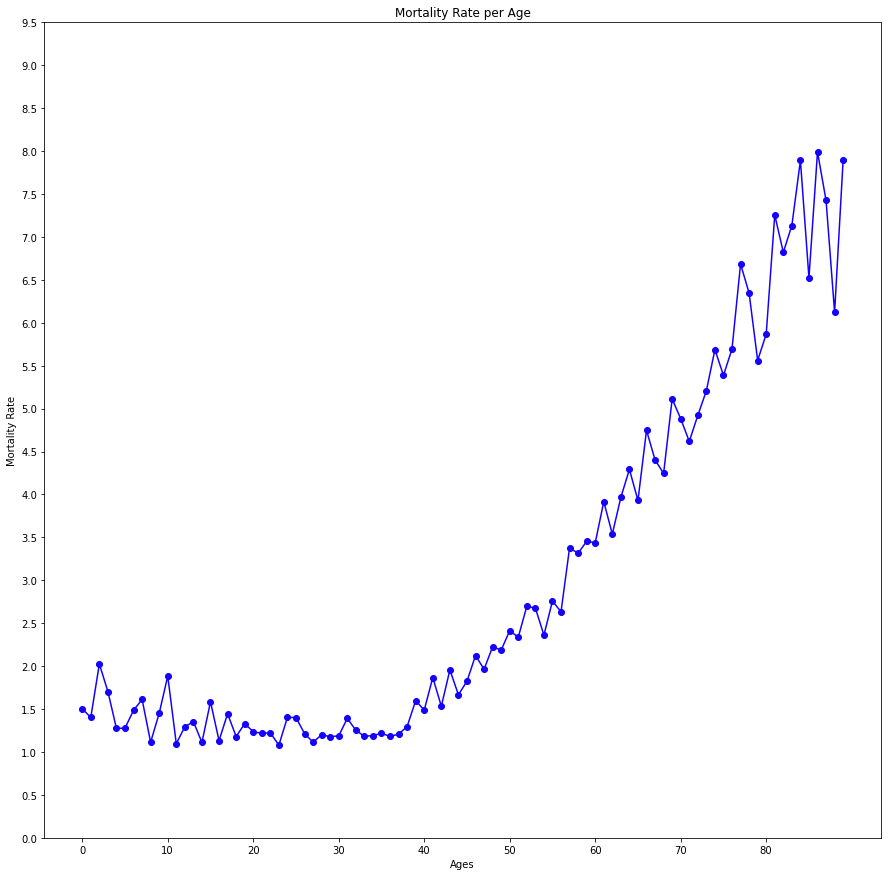

Age group with highest mortality rate: 86


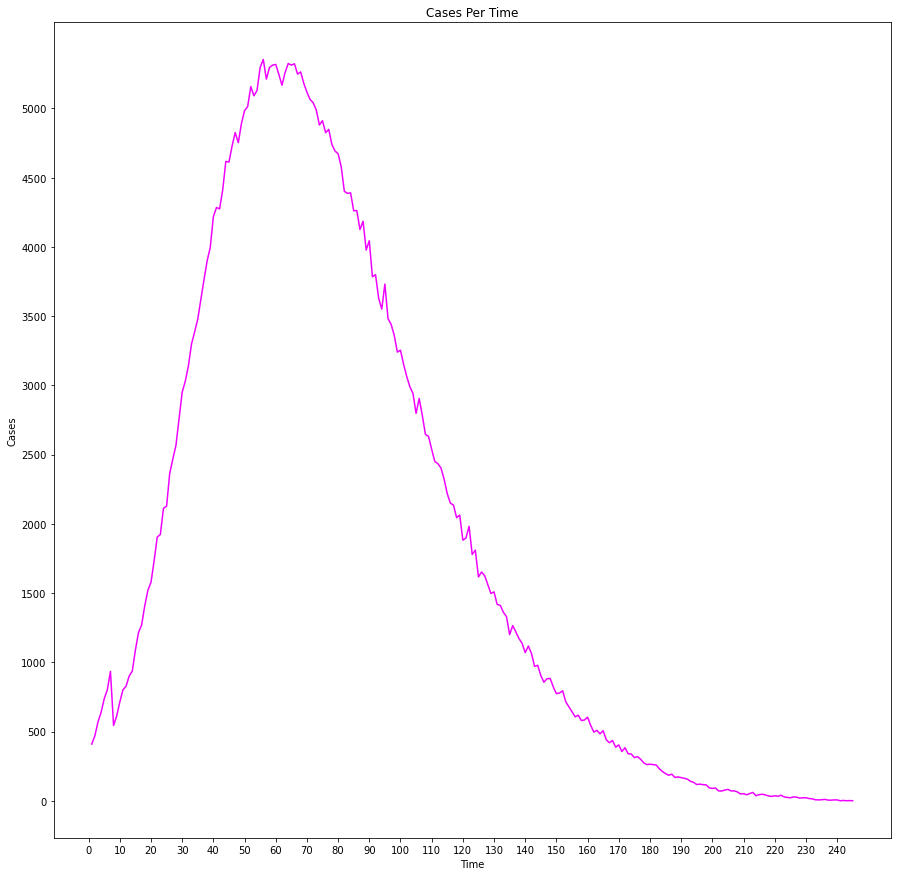

Time when cases were maximum: 55
Time when cases were minimum: 240


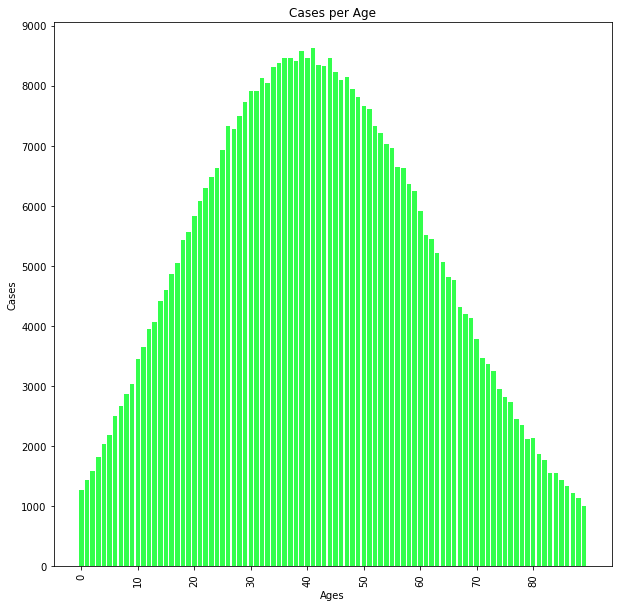

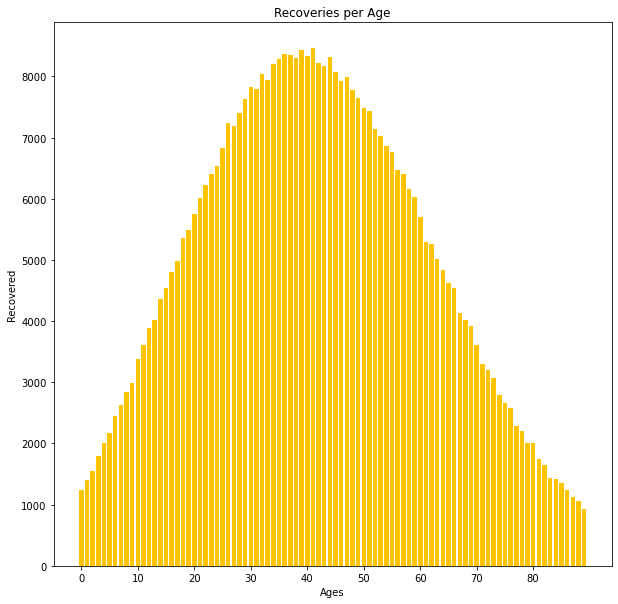

In [3]:
from tkinter import *
from PIL import Image, ImageTk
from matplotlib import pyplot as plt
import mplcursors
import pandas as pd
import numpy as np

def pop_heat():
    df = pd.read_csv('Population.csv')

    # x = np.array(df['x location'])
    # y = np.array(df['y location'])
    x = np.arange(0, 20)
    y = np.arange(0, 20)
    heatmap = np.array(df['Population']).reshape(20, 20)

    fig = plt.figure(figsize=(20,20))
    ax = plt.subplot()
    ax.imshow(heatmap)
    ax.set_xticks(x)
    ax.set_yticks(y)
    ax.set_xticklabels([str(i+1) for i in x], rotation=90)
    ax.set_yticklabels([str(i+1) for i in y])

    for a in range(len(np.arange(1, 21))):
        for b in range(len(np.arange(1, 21))):
            text = ax.text(a, b, heatmap[a, b], ha='center', va='center', color='w')
    plt.show()

    
def cases_heat():
    f = pd.read_csv('updated_covid.csv')
    c = f.fillna(0)
    x = c['x location']
    y = c.columns[1:]

    fig = plt.figure(figsize=(20, 20))
    heat = c.values
    ax = plt.subplot()
    ax.imshow(heat)
    ax.set_xticks(range(0, 20))
    ax.set_yticks(range(0, 20))
    ax.set_xticklabels([str(i+1) for i in range(0, 20)], rotation=90)
    ax.set_yticklabels([str(i+1) for i in range(0, 20)])
    for a in range(len(np.arange(1, 21))):
        for b in range(len(np.arange(1, 21))):
            text = ax.text(a, b, int(heat[a, b]), ha='center', va='center', color='w')
    plt.show()
    
def ages_cases():
    df = pd.read_csv('COVID_dataset.csv')
    age = df[(df['Outcome'] == "Alive") | (df['Outcome'] == 'Dead')].groupby('Age')['Time of reporting'].count()


    fig = plt.figure(figsize=(10, 10))
    ax = plt.subplot()
    barz = ax.bar(range(0, 90), age, color='#33FF4C')
    plt.title('Cases per Age')
    plt.xlabel('Ages')
    plt.ylabel('Cases')
    ax.set_xticks(range(0, 90, 10))
    ax.set_yticks(range(0,10000,1000))
    ax.set_xticklabels([str(i) for i in range(0, 90, 10)], rotation=90)
    mplcursors.cursor(barz)
    plt.show()

def ages_deaths():
    df = pd.read_csv('COVID_dataset.csv')
    deaths = df[df['Outcome'] == "Dead"].groupby('Age')['Time of reporting'].count()


    fig = plt.figure(figsize=(10, 10))
    ax = plt.subplot()

    barz = ax.bar(range(0, 90), deaths, color='#900C3F')
    plt.title('Deaths per Age')
    plt.xlabel('Ages')
    plt.ylabel('Deaths')
    ax.set_yticks(range(0, 250, 10))
    ax.set_xticks(range(0,90, 10))
    mplcursors.cursor(barz)

    plt.show()
    
    
def ages_recoveries():
    df = pd.read_csv('COVID_dataset.csv')
    deaths = df[df['Outcome'] == "Alive"].groupby('Age')['Time of reporting'].count()


    fig = plt.figure(figsize=(10, 10))
    ax = plt.subplot()
    barz = ax.bar(range(0, 90), deaths, color='#FFC300')
    plt.title('Recoveries per Age')
    plt.xlabel('Ages')
    plt.ylabel('Recovered')
    ax.set_xticks(range(0,90, 10))
    mplcursors.cursor(barz)

    plt.show()
    
def time_cases():
    virus = pd.read_csv('COVID_Dataset.csv')
    time = virus.groupby('Time of reporting')['x location'].count()
    fig = plt.figure(figsize=(15, 15))
    ax = plt.subplot()
    plt.plot(range(1, 246), time, color='#F001FF')
    plt.title('Cases Per Time')
    plt.xlabel('Time')
    plt.ylabel('Cases')
    ax.set_yticks(range(0, time.max(), 500))
    ax.set_xticks(range(0, 246, 10))
    plt.show()

    print('Time when cases were maximum: {}'.format(list(time).index(time.max())))
    print('Time when cases were minimum: {}'.format(list(time).index(time.min())))
    
def mortality_rate():
    virus = pd.read_csv('COVID_Dataset.csv')
    ppl = pd.read_csv('Population.csv')


    dead_per_age = virus[virus['Outcome'] == 'Dead'].groupby('Age')['Outcome'].count()
    ppl_per_age = virus.groupby('Age')['Outcome'].count()

    mortality = (dead_per_age / ppl_per_age) * 100

    fig = plt.figure(figsize=(15, 15))
    ax = plt.subplot()
    plt.plot(range(0, 90), mortality, color='#1300FF', marker='o')
    ax.set_xticks(range(0, 90, 10))
    ax.set_yticks(np.arange(0, 10, 0.5))
    plt.xlabel('Ages')
    plt.ylabel('Mortality Rate')
    plt.title('Mortality Rate per Age')
    plt.show()

    print('Age group with highest mortality rate: {}'.format(list(mortality).index(mortality.max())))


root = Tk()



# image = Image.open(r"D:\Users\Vishal\Downloads\code.jpg")
# photo = ImageTk.PhotoImage(image)
# label = Label(root, image=photo)
# label.place(relheight=1, relwidth=1)

population = Button(root, text='Population Heatmap', bg='#00047B', fg='white', command=pop_heat)
population.place(relx=0.4, relheight=0.16, relwidth=0.16)

cases = Button(root, text='Cases Heatmap', bg='#003E0E', fg='#00FF3A', command=cases_heat)
cases.place(relheight=0.16, relwidth=0.16)

a_c = Button(root, text='Cases per Age', bg='red', fg='yellow', command=ages_cases)
a_c.place(relheight=0.16, relwidth=0.16, rely=0.5)

a_d = Button(root, text='Deaths per Age', bg='#581845', fg='#FF0083', command=ages_deaths)
a_d.place(relheight=0.16, relwidth=0.16, relx=0.4, rely=0.5)

a_r = Button(root, text='Recoveries per Age', bg='#00FFF0', fg='#838383', command=ages_recoveries)
a_r.place(relheight=0.16, relwidth=0.16, relx=0.8)

t_c = Button(root, text='Cases per Time', bg='#0FB275', fg='#DAF7A6', command=time_cases)
t_c.place(relheight=0.16, relwidth=0.16, relx=0.8, rely=0.5)

m_r = Button(root, text='Mortality Rate', bg='white', fg='black', command=mortality_rate)
m_r.place(relheight=0.16, relwidth=0.16, relx=0.4, rely=0.8)

root.mainloop()